<a href="https://colab.research.google.com/github/SrMouraSilva/Modelagem-matematica-trabalho-final/blob/main/6_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Programação simbólica
from sympy import *
from sympy.plotting import plot, plot3d
 
# Exibir símbolos nos plots
from google.colab.output._publish import javascript
url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.2/latest.js?config=default"
 
javascript(url=url)
from IPython.display import Math
 
# Manipulação dos dados
import numpy as np
import pandas as pd
 
# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set_theme()

In [ ]:
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

## Questão 6.14

Reconsider the more sophisticated competing species model of Exercise 5 in Chapter 4. Assume $\alpha=10^{-8}.$

Relembrando o Exercício 4.5
> **Exercice 4.5** In the whale problem of Example 4.2 we used a logistic model of population growth, where the growth rate of population $P$ in the absence of interspecies competition is
$$g(P) = rP\left(1-\frac{P}{K}\right).$$
In this problem we will be using a more complex model,
$$g(P) = rP\left(\frac{P-c}{P+c}\right) \left(1-\frac{P}{K}\right),$$
in which the parameter $c$ represents a minimum viable population level below which the growth rate is negative. Assume that $\alpha=10^{-8}$ and that the minimum viable population level is 3,000 for blue whales and 15,000 for fin whales.

> a) Can both species of whales coexist? Use the five-step method, and model as a dynamical system in steady state
>
> b) Draw the vector field for this problem. Indicate the location of each equilibrium point.
>
> c) Classify each equilibrium point in the state space as stable or unstable.
>
> d) Suppose that there are currently 5,000 blue whales and 70,000 fin whales. What does this model predict about the future of the two species?

### a) Use a computer implementation of the Euler method to simulate the behavior of this model, starting with the initial conditions $x_1=5{,}000$ blue whales and $x_2=70{,}000$ fin whales. Perform a sensitivity analysis on both $T$ and $N$ to ensure the validity of your results, as in the text. What happens to the two species of whales over the long term, according to this model? Do both species of whales grow back,or will one or both species become extinct? How long does this take?

Temos as seguintes equações para o modelo:

In [ ]:
def equacoes(x1, x2):
    return (
        0.05*x1*((x1-3000)/(x1+3000))*(1-(x1/150_000)) - alpha*x1*x2,
        0.08*x2*((x2-15000)/(x2+15000))*(1-(x2/400_000)) - alpha*x1*x2
    )

x1, x2 = var('x1 x2', real=True)
alpha = 1e-8

dFdx1, dFdx2 = equacoes(x1, x2)


Math(f"""
\\begin{{aligned}}
\\frac{{dx_1}}{{dt}} = {latex(dFdx1)} \\\\
\\frac{{dx_2}}{{dt}} = {latex(dFdx2)} \\\\
\\end{{aligned}}
""")

<IPython.core.display.Math object>

O método de Euler implementado:

In [ ]:
def MetodoEuler(funcoes, variaveis, x1_0, x2_0, N=100, t_0=0, T=400):
    retorno = np.zeros((3, N))
    f1 = lambdify(variaveis, funcoes[0], 'numpy')
    f2 = lambdify(variaveis, funcoes[1], 'numpy')
    
    x1_n = x1_0
    x2_n = x2_0
    t_n = t_0

    retorno[:, 0] = [t_n, x1_n, x2_n]

    h = (T-t_0)/N
    for n in range(N-1):
        x1_n = x1_n + h*f1(x1_n, x2_n)
        x2_n = x2_n + h*f2(x1_n, x2_n)
        t_n = t_n+h

        retorno[:, n+1] = [t_n, x1_n, x2_n]
    
    return pd.DataFrame(retorno.T, columns=['t', 'x1', 'x2'])

simulacao_a = MetodoEuler(
    funcoes=(dFdx1, dFdx2),
    variaveis=(x1, x2),
    x1_0=5_000,
    x2_0=70_000,
    N=600,
    T=400
)

Aplicada a simulação para uma quantidade considerável de anos, podemos ver o comportamento das populações no intervalo de tempo considerado:

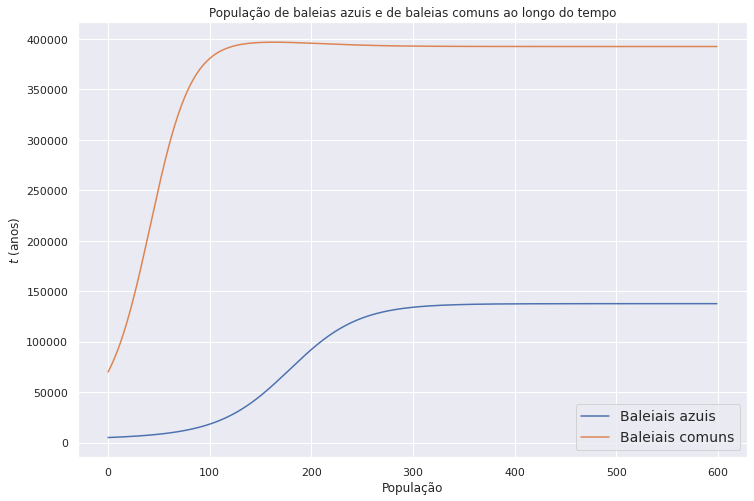

In [ ]:
simulacao_a[['x1', 'x2']].plot(
    title='População de baleias azuis e de baleias comuns ao longo do tempo',
    xlabel='População', ylabel='$t$ (anos)'
)
plt.legend(['Baleiais azuis', 'Baleiais comuns'])

Nota-se que no gráfico acima, a quantidade de baleias-comuns cresce até chegar a um valor próximo do limite máximo populacional de baleias-comuns ($400{,}000$) por volta do ano 60. A partir do ano 60 aproximadamente, a medida que a quantidade de baleias-azuis aumenta, a quantidade de baleias-comuns diminui levemente, até que ambas as populações fiquem em estabilidade, logo as duas espécies coexistirão. Por fim, as duas espécies de baleias não voltarão a crescer e nem uma ou ambas as espécies se extinguirão, pois a coexistência entre as duas espécies existirá a longo prazo por causa da estabilidade.

Podemos ter uma noção melhor do comportamento do crescimento populacional das espécies  ao visualizar o comportamento sobre o campo vetorial (setas azuis).
No gráfico abaixo, as setas do campo vetorial foram normalizadas para facilitar a visualização. A linha vermelha corresponde a simulação do modelo, apresentando a relação entre a população das espécies.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


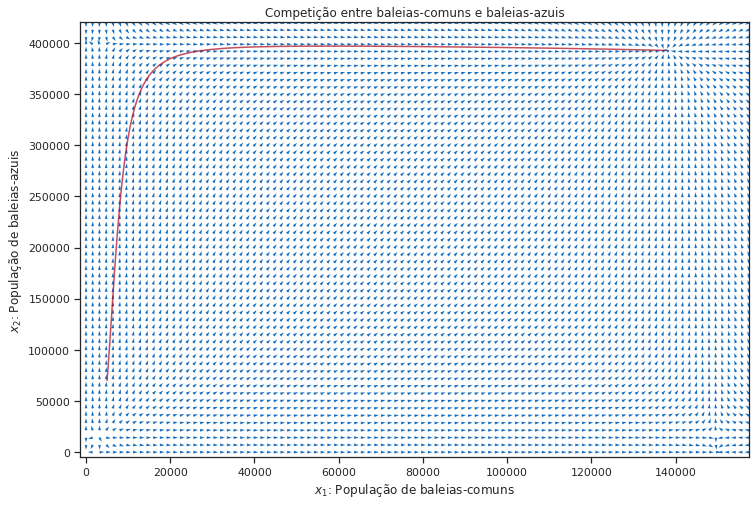

In [ ]:
def campo_vetorial(plots, cores, xlim, ylim, plot_campo_vetorial=True, legenda=None, solucoes=None):
    fig = plt.figure(figsize=(12, 8))
 
    if plot_campo_vetorial:
        sns.set_style("ticks")
        x1graf, x2graf = np.meshgrid(np.linspace(0, xlim[1], 100), np.linspace(0, ylim[1], 60))
        f1, f2 = equacoes(x1graf, x2graf)
        normalizador = np.sqrt(f1**2+f2**2)
        plt.quiver(x1graf, x2graf, f1/normalizador, f2/normalizador, color='#156dbd', angles='xy', figure=fig)
 
    ax = plt.axes()
    ax.set_title("Competição entre baleias-comuns e baleias-azuis")
    ax.set_xlabel('$x_1$: População de baleias-comuns')
    ax.set_ylabel('$x_2$: População de baleias-azuis')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
 
    if solucoes is not None:
        plt.scatter(solucoes[0], solucoes[1], marker='o', edgecolors='black', color='w')
    
    for plot, cor in zip(plots, cores):
        ax.plot(*plot, color=cor,)
 
    if legenda is not None:
        plt.legend(legenda)
 
    plt.show();
    sns.set_theme()


campo_vetorial(
    [[simulacao_a.x1, simulacao_a.x2]],
    xlim=[-1_500, 150_000*1.05],
    ylim=[-5_000, 400_000*1.05],
    cores=['#b00d23bb']*100,
)

A seguir, são apresentadas simulações para quando variamos $N$. Dado que $N$ determina o número de pontos da simulação, teremos três situações:

* Sendo $N = 5$, o método de Euler diverge. 

* Sendo $N = 10, 15$, a população de baleias-azuis converge, mas é incrementado bastante ruído na população de baleias-comuns, de modo que não é possível usar a simulação de forma confiável.

* Sendo  $N = 20, 25, 30, 50, 400$, a simulação roda tempo o suficiente para que se chegue no ponto de equilíbrio de estabilidade. Nota-se que quando se chega no ponto de equilíbrio estável, a população de ambas as espécies não varia.

Assim, a partir de $N = 20$ é possível validar os resultados que obtivemos anteriormente neste item. Vale ressaltar que $T =  400$ para todos os casos. 


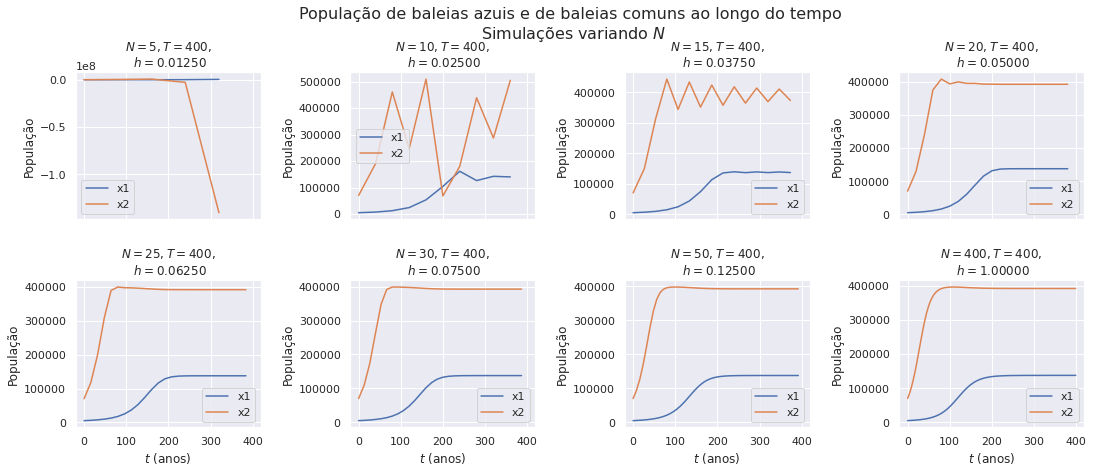

In [ ]:
Ns = [
    5, 10, 15, 20,
    25, 30, 50, 400
]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 7), sharex=True)
fig.tight_layout(pad=4.5)
fig.suptitle(f'População de baleias azuis e de baleias comuns ao longo do tempo\n Simulações variando $N$', fontsize=16)
plt.subplots_adjust(top=0.85)


for i, (N, ax) in enumerate(zip(Ns, axes.flatten())):
    T = 400
    simulacao = MetodoEuler(
        funcoes=(dFdx1, dFdx2),
        variaveis=(x1, x2),
        x1_0=5_000,
        x2_0=70_000,
        N=N,
        T=T
    )
    simulacao.index = simulacao['t']
    simulacao[['x1', 'x2']].plot(title=f'$N={N}, T={T}$,\n $h={N/T:.5f}$', xlabel="$t$ (anos)", ylabel="População", ax=ax)

A seguir, são apresentadas simulações para quando variamos $T$. Dado que $T$ determina o tempo da simulação em anos, teremos duas situações:

* Sendo $T = 5, 10, 15, 20, 25, 30$, a simulação não roda tempo o suficiente para que se chegue no ponto de equilíbrio estável; 

* Sendo $T = 400, 4{,}000$, a simulação roda tempo o suficiente para que se chegue no ponto de equilíbrio estável. Nota-se que quando se chega no ponto de equilíbrio estável, a população de ambas as espécies não varia.

Assim, a partir de $T = 400$ é possível validar os resultados que obtivemos anteriormente neste item. Vale ressaltar que $N =  600$ para todos os casos.

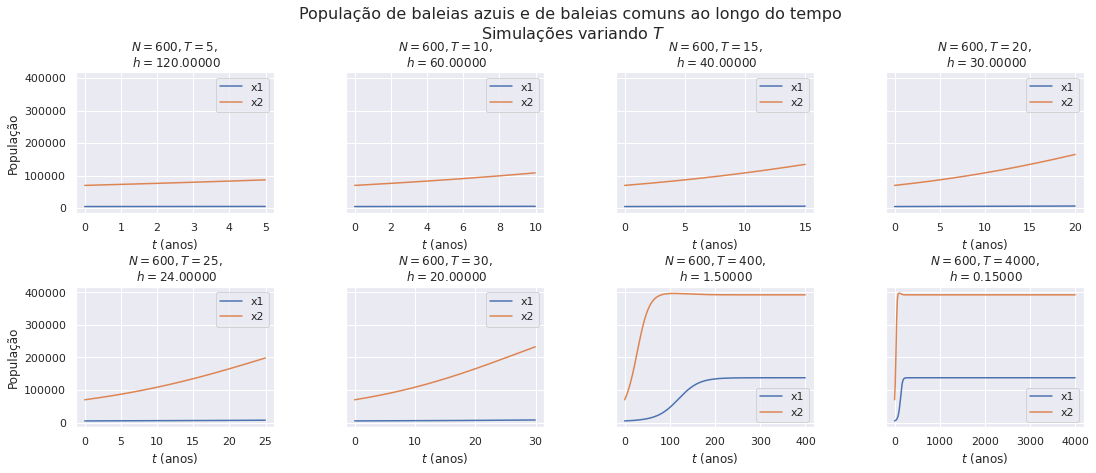

In [ ]:
Ts = [
    5, 10, 15, 20,
    25, 30, 400, 4000
]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 7), sharey=True)
fig.tight_layout(pad=4.5)
fig.suptitle(f'População de baleias azuis e de baleias comuns ao longo do tempo\n Simulações variando $T$', fontsize=16)
plt.subplots_adjust(top=0.85)

for i, (T, ax) in enumerate(zip(Ts, axes.flatten())):
    N = 600
    simulacao = MetodoEuler(
        funcoes=(dFdx1, dFdx2),
        variaveis=(x1, x2),
        x1_0=5_000,
        x2_0=70_000,
        N=N,
        T=T
    )
    simulacao.index = simulacao['t']
    simulacao[['x1', 'x2']].plot(title=f'$N={N}, T={T}$,\n $h={N/T:.5f}$', xlabel="$t$ (anos)", ylabel="População", ax=ax)

### b) Repeat part (a) for a range of initial conditions for both blue and fin whales. Tabulate the results of your simulations, and answer the same questions as in part (a) for each case.

Testaremos para os seguintes pontos iniciais. Vale ressaltar que tais pontos foram escolhidos para apresentar as condições em que nenhuma, alguma ou todas as espécies coexista.

In [ ]:
x1_final = simulacao_a.x1.iloc[-1]
x2_final = simulacao_a.x2.iloc[-1]

pontos_iniciais = [
    [0, 0],
    [2499, 14999],
    [2499, x2_final/5],
    [x1_final/5, 14999],
    [x1_final/5, x2_final/5]
]

pontos_iniciais

[[0, 0],
 [2499, 14999],
 [2499, 78513.62117132176],
 [27539.563985315654, 14999],
 [27539.563985315654, 78513.62117132176]]

Aplica-se a simulação para cada condição inicial.

In [ ]:
simulacoes_b = []

for ponto_inicial in pontos_iniciais:
    simulacoes_b.append(MetodoEuler(
        funcoes=(dFdx1, dFdx2),
        variaveis=(x1, x2),
        x1_0=ponto_inicial[0],
        x2_0=ponto_inicial[1],
        N=600,
        T=400
    ))

Os resultados das simulações são apresentados na tabela seguinte. As duas colunas da esquerda indicam a posição inicial de ambas as espécies (ano $t=0$) e as duas colunas da direita apresentam a população das espécies no fim do experimento (ano $t=400$):

In [ ]:
pd.DataFrame({
    'x_1,t=0': [p[0] for p in pontos_iniciais],
    'x_2,t=0': [p[1] for p in pontos_iniciais],
    'x_1,t=400': [s.iloc[-1].x1 for s in simulacoes_b],
    'x_2,t=400': [s.iloc[-1].x2 for s in simulacoes_b]
})

,"x_1,t=0","x_2,t=0","x_1,t=400","x_2,t=400"
0,0.000000,0.000000,0.000000,0.000000e+00
1,2499.000000,14999.000000,0.000147,7.558840e-04
2,2499.000000,78513.621171,0.000019,4.000000e+05
3,27539.563985,14999.000000,149999.996498,4.148360e-07
4,27539.563985,78513.621171,137698.350696,3.925680e+05


Aplicada a simulação para uma quantidade considerável de anos, podemos ver o comportamento das populações das cinco simulações realizadas no intervalo de tempo considerado:

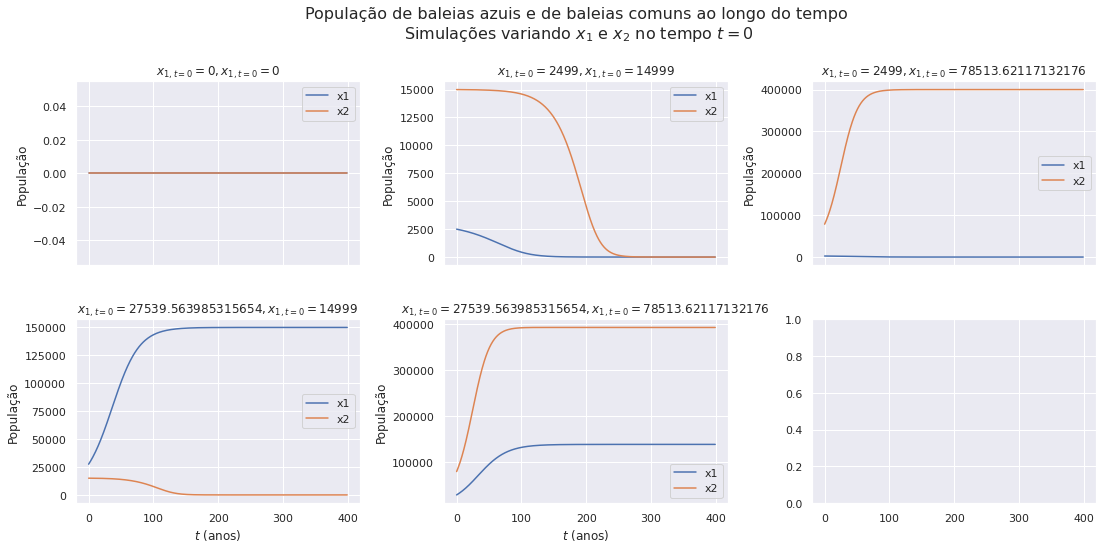

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8), sharex=True)
fig.tight_layout(pad=4)
fig.suptitle(f'População de baleias azuis e de baleias comuns ao longo do tempo\n Simulações variando $x_1$ e $x_2$ no tempo $t=0$', fontsize=16)
plt.subplots_adjust(top=0.85)

for i, (simulacao, ax, (x10, x20)) in enumerate(zip(simulacoes_b, axes.flatten(), pontos_iniciais)):
    simulacao.index = simulacao['t']
    simulacao[['x1', 'x2']].plot(title=f'$x_{{1,t=0}}={x10}, x_{{1,t=0}}={x20}$', xlabel="$t$ (anos)", ylabel="População", ax=ax)

* Pelo gráfico com condições iniciais $x_1 = 0$ e $x_2 = 0$ acima, nota-se que a quantidade de baleias-comuns  não varia e nem a de baleias-azuis ao longo do tempo.

* Pelo gráfico com condições iniciais $x_1 = 2{,}499$ e $x_2 = 14{,}999$ acima, nota-se que a quantidade de baleias-comuns diminui até chegar a um valor próximo de zero. Já a quantidade de baleias-azuis diminui também até chegar a um valor próximo de zero, logo as duas espécies não coexistirão. Por fim, as duas espécies de baleias não voltarão a crescer, e ambas as espécies se extinguirão.

* Pelo gráfico com condições iniciais $x_1 = 2{,}499$ e $x_2 = 78{,}513.60692$ acima, nota-se que a quantidade de baleias-comuns aumenta até chegar ao limite máximo populacional de baleias-comuns ($400{,}000$). Já a quantidade de baleias-azuis diminui até chegar a um valor próximo de zero, logo as duas espécies não coexistirão. Por fim, as duas espécies de baleias não voltarão a crescer, e uma das espécies se extinguirá.

* Pelo gráfico com condições iniciais $x_1 = 27{,}539.672545$ e $x_2 = 14{,}999$ acima, nota-se que a quantidade de baleias-comuns diminui até chegar a um valor próximo de zero. Já a quantidade de baleias-azuis aumenta até chegar a um valor próximo de ($140{,}000$), logo as duas espécies coexistirão. Por fim, as duas espécies de baleias não voltarão a crescer, nem uma das ou ambas espécies se extinguirão.

* Pelo gráfico com condições iniciais $x_1 = 27{,}539.672545$ e $x_2 = 78{,}513.60692$ acima, nota-se que a quantidade de baleias-comuns aumenta até chegar ao limite máximo populacional de baleias-comuns ($400{,}000$). Já a quantidade de baleias-azuis aumenta até chegar a um valor próximo do limite populacional de baleias-azuis ($150{,}000$), logo as duas espécies não coexistirão. Por fim, as duas espécies de baleias não voltarão a crescer e nem uma ou ambas as espécies se extinguirão, pois a coexistência entre as duas espécies existirá a longo prazo por causa da estabilidade.

Podemos ter uma noção melhor do comportamento do crescimento populacional das espécies para todos os experimentos ao visualizar o comportamento sobre o campo vetorial (setas azuis).
No gráfico abaixo, as setas do campo vetorial foram normalizadas para facilitar a visualização. As linhas vermelhas correspondem as simulações do modelo, apresentando a relação entre a população das espécies.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


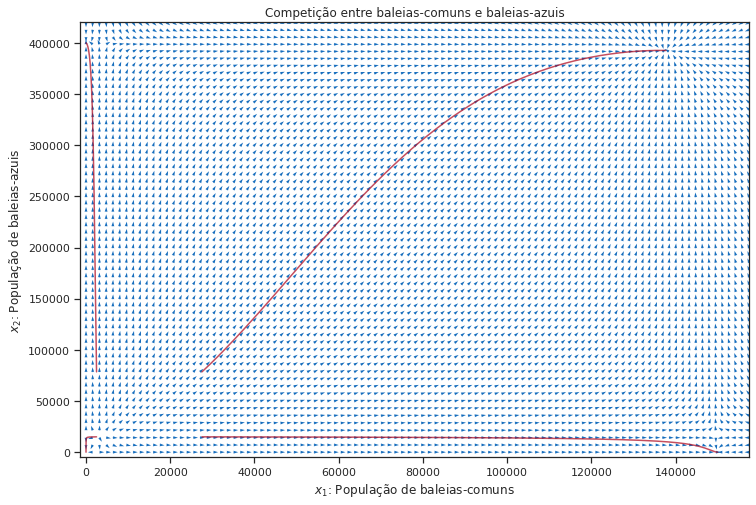

In [ ]:
campo_vetorial(
    [(s.x1, s.x2) for s in simulacoes_b],
    xlim=[-1_500, 150_000*1.05],
    ylim=[-5_000, 400_000*1.05],
    cores=['#b00d23bb']*100,
)

A seguir, são apresentadas simulações para quando variamos $N$. Dado que $N$ determina o número de pontos da simulação, teremos:

* Caso $x_1 = 0$ e $x_2 = 0$
 * Sendo $N = $ $5$, $10$, $15$, $20$, $25$, $30$, $50$ e $400$, a solução não varia ao longo do tempo.
 * Assim, a partir de $N = 5$ é possível validar os resultados que obtivemos anteriormente neste item. Vale ressaltar que $T =  400$ para todos os casos. 

* Caso $x_1 = 2{,}499$ e $x_2 = 14{,}999$ 
 * Sendo $N = 5, 10, 15, 20$, o método de Euler diverge, pois algumas soluções obtidas terão valores negativos para as baleias-azuis ou para as baleias-comuns. 

 * Sendo  $N = 25, 30, 50, 400$, a simulação roda tempo o suficiente para que se chegue no ponto de equilíbrio de estabilidade. Nota-se que quando se chega no ponto de equilíbrio estável, a população de ambas as espécies não varia.

 * Assim, a partir de $N = 25$ é possível validar os resultados que obtivemos anteriormente neste item. Vale ressaltar que $T =  400$ para todos os casos. 

* Caso $x_1 = 2{,}499$ e $x_2 = 78{,}513.60692$ 
 * Sendo $N = 5$, o método de Euler diverge. 
 * Sendo $N = 10,15$, a população de baleias-azuis converge, mas é incrementado bastante ruído na população de baleias-comuns, de modo que não é possível usar a simulação de forma confiável.
 * Sendo  $N = 20, 25, 30, 50, 400$, a simulação roda tempo o suficiente para que se chegue no ponto de equilíbrio de estabilidade. Nota-se que quando se chega no ponto de equilíbrio estável, a população de ambas as espécies não varia.

 * Assim, a partir de $N = 20$ é possível validar os resultados que obtivemos anteriormente neste item. Vale ressaltar que $T =  400$ para todos os casos.  

* Caso $x_1 = 27{,}539.672545$ e $x_2 = 14{,}999$ 
 * Sendo $N = 5$, o método de Euler diverge. 
 * Sendo $N = 10$, a população de baleias-azuis convergirá caso bote mais tempo para rodar, mas é incrementado bastante ruído na população de baleias-comuns, de modo que não é possível usar a simulação de forma confiável.
 * Sendo  $N = 15, 20, 25, 30, 50, 400$, a simulação roda tempo o suficiente para que se chegue no ponto de equilíbrio de estabilidade. Nota-se que quando se chega no ponto de equilíbrio estável, a população de ambas as espécies não varia.

 * Assim, a partir de $N = 15$ é possível validar os resultados que obtivemos anteriormente neste item. Vale ressaltar que $T =  400$ para todos os casos.  

* Caso $x_1 = 27{,}539.672545$ e $x_2 = 78{,}513.60692$
 * Sendo $N = 5$, o método de Euler diverge. 
 * Sendo $N = 10,15$, a população de baleias-azuis converge, mas é incrementado bastante ruído na população de baleias-comuns, de modo que não é possível usar a simulação de forma confiável.
 * Sendo  $N = 20, 25, 30, 50, 400$, a simulação roda tempo o suficiente para que se chegue no ponto de equilíbrio de estabilidade. Nota-se que quando se chega no ponto de equilíbrio estável, a população de ambas as espécies não varia.

 * Assim, a partir de $N = 20$ é possível validar os resultados que obtivemos anteriormente neste item. Vale ressaltar que $T =  400$ para todos os casos.  

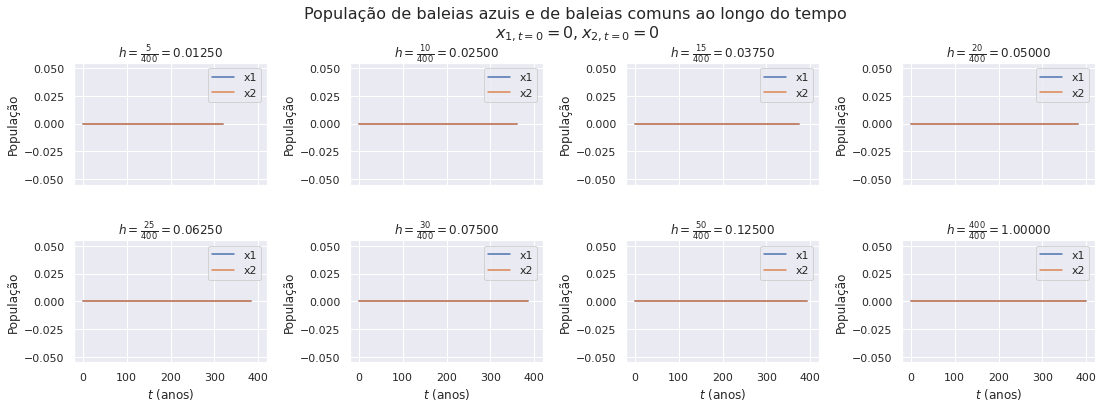

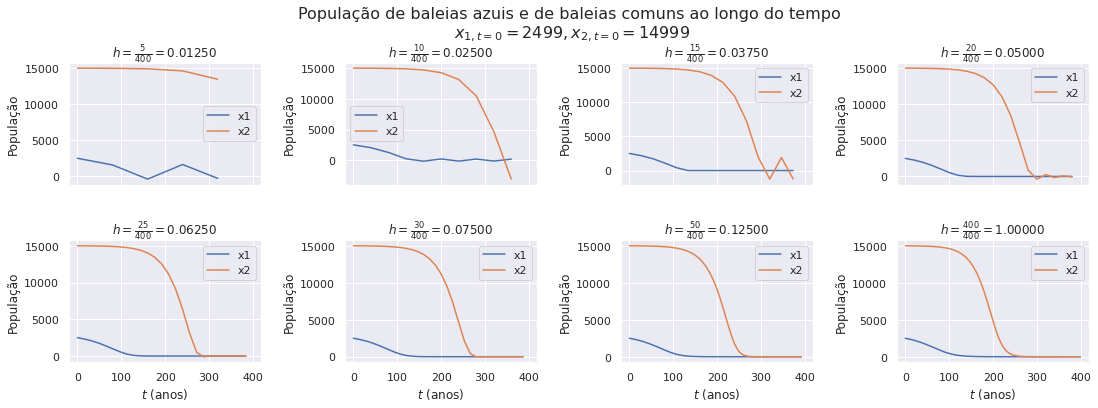

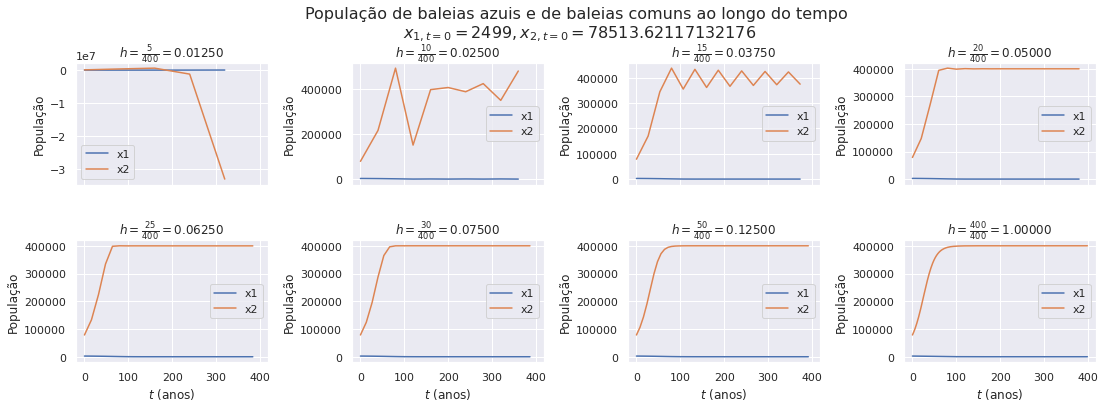

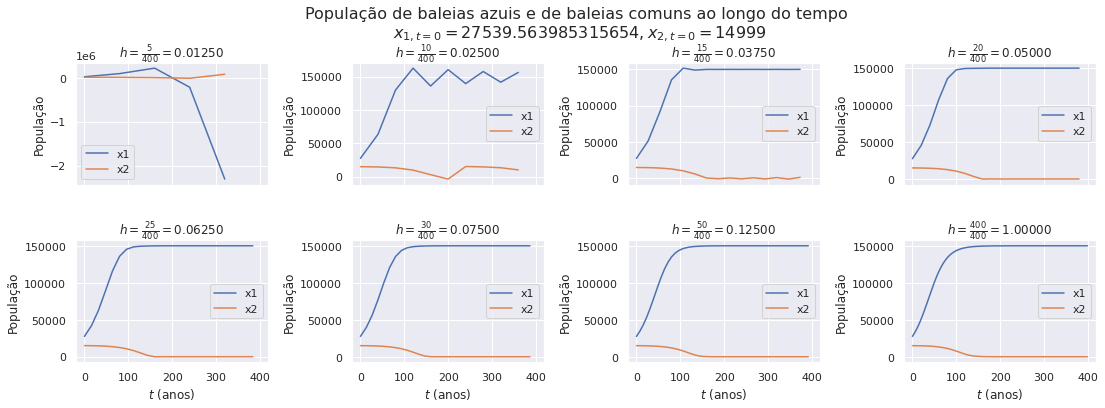

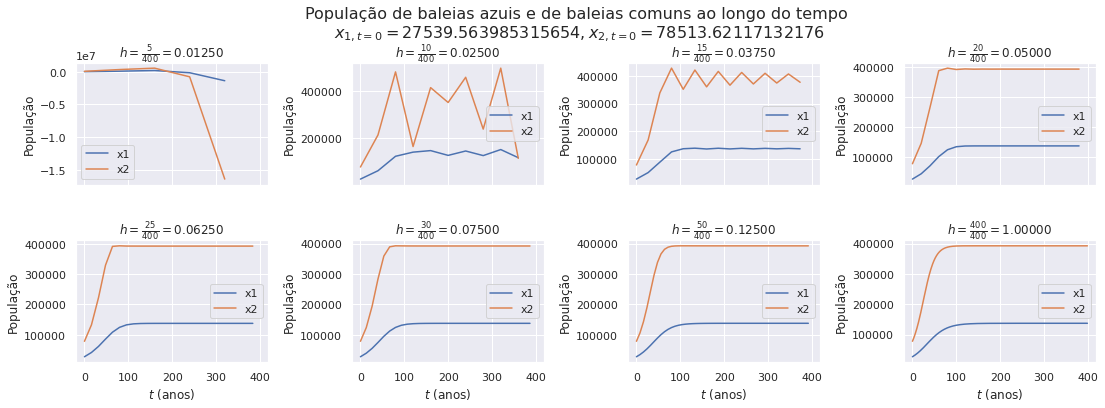

In [ ]:
for x1_0, x2_0 in pontos_iniciais:
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 6), sharex=True)
    fig.tight_layout(pad=4)
    fig.suptitle(f'População de baleias azuis e de baleias comuns ao longo do tempo\n $x_{{1,t=0}}={x1_0}, x_{{2,t=0}}={x2_0}$', fontsize=16)
    plt.subplots_adjust(top=0.85)

    for (N, ax) in zip(Ns, axes.flatten()):
        T = 400
        simulacao = MetodoEuler(
            funcoes=(dFdx1, dFdx2),
            variaveis=(x1, x2),
            x1_0=x1_0,
            x2_0=x2_0,
            N=N,
            T=T
        )
        simulacao.index = simulacao['t']
        simulacao[['x1', 'x2']].plot(title=f'$h=\\frac{{{N}}}{{{T}}}={N/T:.5f}$', xlabel="$t$ (anos)", ylabel="População", ax=ax)

    plt.plot()

A seguir, são apresentadas simulações para quando variamos $T$. Dado que $T$ determina o tempo da simulação em anos, teremos:

* Caso $x_1 = 0$ e $x_2 = 0$
 * Sendo $T = $ $5, 10, 15, 20, 25, 30, 400, 4{,}000$, a solução não varia ao longo do tempo.
 * Assim, a partir de $T = 5$ é possível validar os resultados que obtivemos anteriormente neste item. Vale ressaltar que $N =  600$ para todos os casos. 

* Caso $x_1 = 2{,}499$ e $x_2 = 14{,}999$ 
 * Sendo $T = 5, 10, 15, 20, 25, 30$, a simulação não roda tempo o suficiente para que se chegue no ponto de equilíbrio estável; 
 * Sendo $T = 400, 4{,}000$, a simulação roda tempo o suficiente para que se chegue no ponto de equilíbrio estável. Nota-se que quando se chega no ponto de equilíbrio estável, a população de ambas as espécies não varia.
 * Assim, a partir de $T = 400$ é possível validar os resultados que obtivemos anteriormente neste item. Vale ressaltar que $N =  400$ para todos os casos. 

* Caso $x_1 = 2{,}499$ e $x_2 = 78{,}513.60692$ 
 * Sendo $T = 5, 10, 15, 20, 25, 30$, a simulação não roda tempo o suficiente para que se chegue no ponto de equilíbrio estável; 
 * Sendo $T = 400, 4{,}000$, a simulação roda tempo o suficiente para que se chegue no ponto de equilíbrio estável. Nota-se que quando se chega no ponto de equilíbrio estável, a população de ambas as espécies não varia.
 * Assim, a partir de $T = 400$ é possível validar os resultados que obtivemos anteriormente neste item. Vale ressaltar que $N =  600$ para todos os casos.
* Caso $x_1 = 27{,}539.672545$ e $x_2 = 14{,}999$ 
 * Sendo $T = 5, 10, 15, 20, 25, 30$, a simulação não roda tempo o suficiente para que se chegue no ponto de equilíbrio estável; 
 * Sendo $T = 400, 4{,}000$, a simulação roda tempo o suficiente para que se chegue no ponto de equilíbrio estável. Nota-se que quando se chega no ponto de equilíbrio estável, a população de ambas as espécies não varia.
 * Assim, a partir de $T = 400$ é possível validar os resultados que obtivemos anteriormente neste item. Vale ressaltar que $N =  600$ para todos os casos.
* Caso $x_1 = 27{,}539.672545$ e $x_2 = 78{,}513.60692$
 * Sendo $T = 5, 10, 15, 20, 25, 30$, a simulação não roda tempo o suficiente para que se chegue no ponto de equilíbrio estável; 
 * Sendo $T = 400, 4{,}000$, a simulação roda tempo o suficiente para que se chegue no ponto de equilíbrio estável. Nota-se que quando se chega no ponto de equilíbrio estável, a população de ambas as espécies não varia.
 * Assim, a partir de $T = 400$ é possível validar os resultados que obtivemos anteriormente neste item. Vale ressaltar que $N =  600$ para todos os casos.  

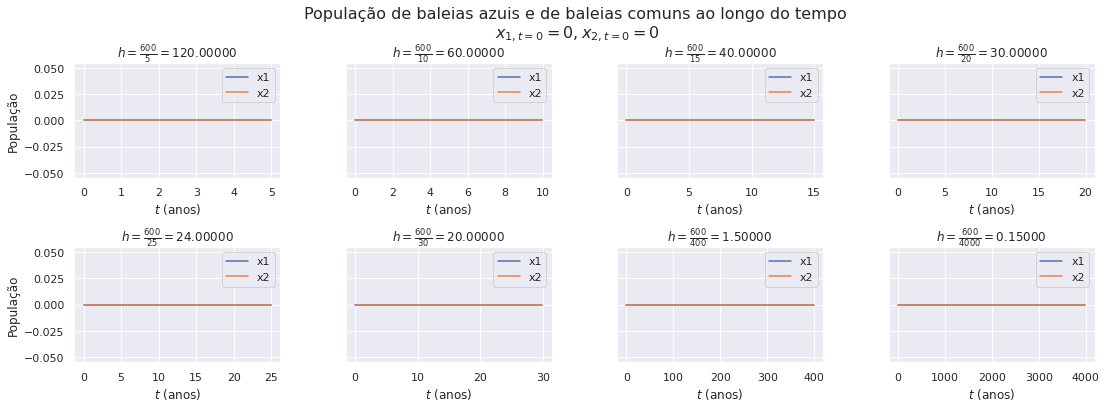

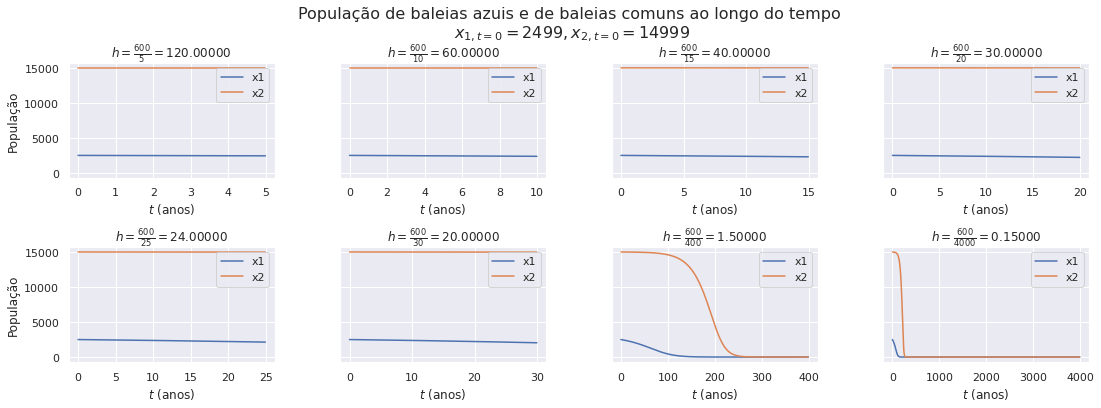

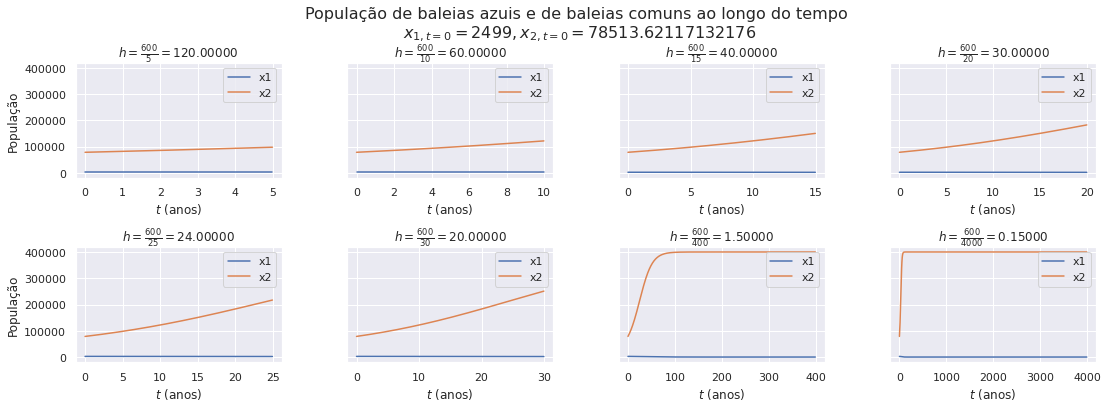

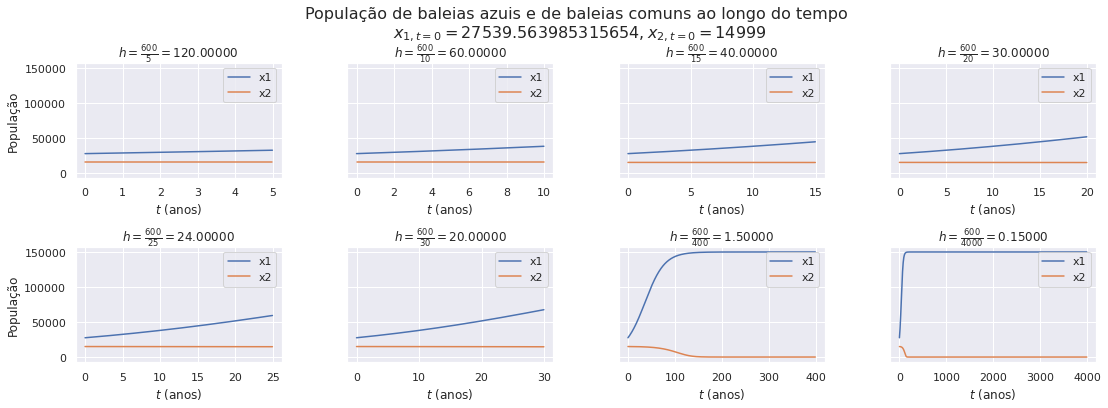

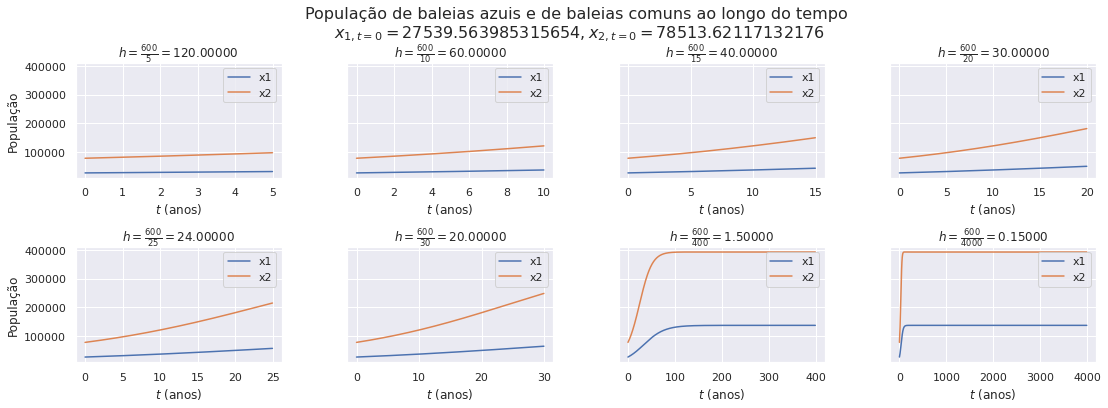

In [ ]:
for x1_0, x2_0 in pontos_iniciais:
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 6), sharey=True)
    fig.tight_layout(pad=4)
    fig.suptitle(f'População de baleias azuis e de baleias comuns ao longo do tempo\n $x_{{1,t=0}}={x1_0}, x_{{2,t=0}}={x2_0}$', fontsize=16)
    plt.subplots_adjust(top=0.85)

    for (T, ax) in zip(Ts, axes.flatten()):
        N = 600
        simulacao = MetodoEuler(
            funcoes=(dFdx1, dFdx2),
            variaveis=(x1, x2),
            x1_0=x1_0,
            x2_0=x2_0,
            N=N,
            T=T
        )
        simulacao.index = simulacao['t']
        simulacao[['x1', 'x2']].plot(title=f'$h=\\frac{{{N}}}{{{T}}}={N/T:.5f}$', xlabel="$t$ (anos)", ylabel="População", ax=ax)

    plt.plot()

### c) Use the results of parts (a) and (b) in order to draw the complete phase portrait for this system.

Realizando mais algumas simulações

In [ ]:
from itertools import product

pontos_iniciais_c = list(product(
    np.linspace(0, 3_000, 5),
    np.linspace(0, 15_000, 5)
))
pontos_iniciais_c += list(product(
    np.linspace(3_000, 175_000, 5),
    np.linspace(0, 15_000, 5)
)) 
pontos_iniciais_c += list(product(
    np.linspace(0, 3_000, 5),
    np.linspace(15_000, 400_000, 5)
))
pontos_iniciais_c += list(product(
    np.linspace(3_000+500, 175_000, 12),
    np.linspace(15_000+500, 420_000, 12)
))

simulacoes_c = []
for ponto_inicial in pontos_iniciais_c:
    simulacoes_c.append(MetodoEuler(
        funcoes=(dFdx1, dFdx2),
        variaveis=(x1, x2),
        x1_0=ponto_inicial[0],
        x2_0=ponto_inicial[1],
        N=600,
        T=400
    ))

Teremos as execuções com os seguintes pontos iniciais

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


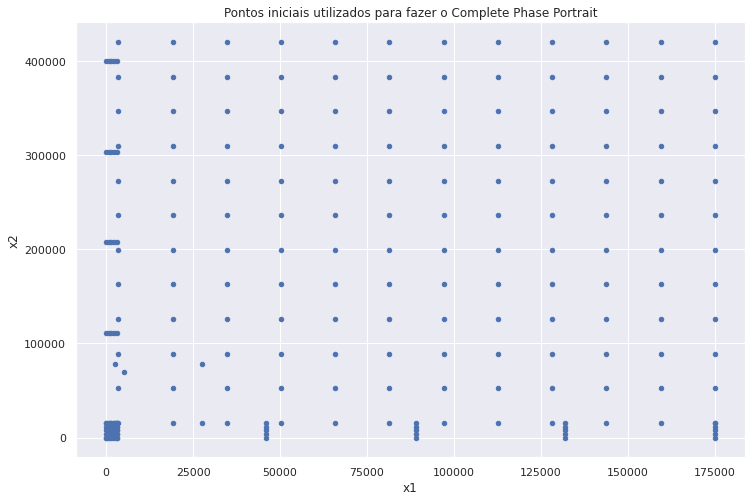

In [ ]:
simulacoes_c += simulacoes_b + [simulacao]

pd.DataFrame(pontos_iniciais_c + pontos_iniciais + [(5_000, 70_000)], columns=['x1', 'x2']).plot.scatter(x='x1', y='x2', title="Pontos iniciais utilizados para fazer o Complete Phase Portrait")

Por fim, o Complete Phase Portrait

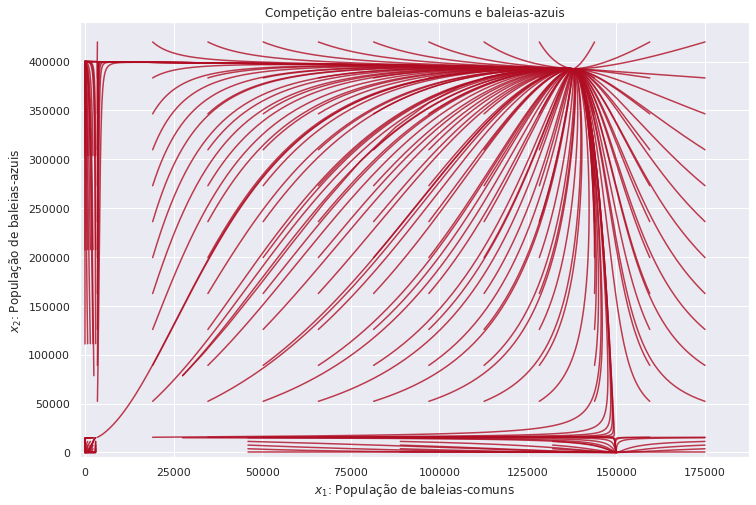

In [ ]:
campo_vetorial(
    [(s.x1, s.x2) for s in simulacoes_c],
    xlim=[-1_500, 150_000*1.25],
    ylim=[-5_000, 400_000*1.10],
    cores=['#b00d23cc']*1000,
    plot_campo_vetorial=False
)

### d) Indicate the region on the phase portrait where one or both species of whale are destined to become extinct.

Para indicar as regiões em que há a extinção de uma ou mais espécie, executaremos algumas simulações ($80\cdot80=6400$ simulações) e verificaremos as regiões em que há a extinção de ao menos uma espécie.
 
Observe que pelo gráfico do item c já dá para ter uma noção. Mas, aproveitamos aqui o poder computacional para extrair mais informações.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


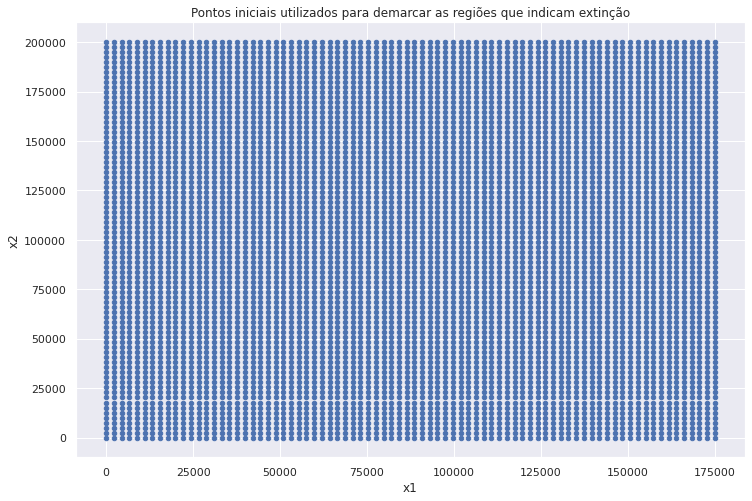

In [ ]:
pontos_iniciais_d = list(product(
    np.linspace(0, 175_000, 80),
    np.linspace(0, 200_000, 80)
))

pontos_iniciais_dataframe_d = pd.DataFrame(pontos_iniciais_d, columns=['x1', 'x2'])
pontos_iniciais_dataframe_d.plot.scatter(x='x1', y='x2', title="Pontos iniciais utilizados para demarcar as regiões que indicam extinção")

Executando as simulações:

In [ ]:
from tqdm import tqdm

simulacoes_d = []

for ponto_inicial in tqdm(pontos_iniciais_d):
    simulacoes_d.append(MetodoEuler(
        funcoes=(dFdx1, dFdx2),
        variaveis=(x1, x2),
        x1_0=ponto_inicial[0],
        x2_0=ponto_inicial[1],
        N=600,
        T=400
    ))

100%|██████████| 6400/6400 [02:23<00:00, 44.60it/s]


Colorindo os pontos iniciais conforme o final da execução

In [ ]:
simulacoes_d[0].iloc[-1]

resultados_d = [s.iloc[-1] for s in simulacoes_d]
resultados_d = pd.concat(resultados_d, axis=1).T

resultados_d['extincao_x1'] = (resultados_d.x1 < 10)
resultados_d['extincao_x2'] = (resultados_d.x2 < 10)
resultados_d['extincao_x1_x2'] = resultados_d.extincao_x1 & resultados_d.extincao_x2

In [ ]:
def colorir(row):
    if row.extincao_x1_x2:
        return '#ff0000'
    elif row.extincao_x1:
        return '#ff8888'
    elif row.extincao_x2:
        return '#ffaaff'
    else:
        return '#8888ff'
 
cores = resultados_d.apply (colorir, axis=1)

Pelo gráfico abaixo, os pontos que formam a região da cor vermelha significam que as duas espécies de baleias se extinguiram. Já os pontos que formam a região da cor rosa revelam que somente a população de baleias-comuns será extinta e a população de baleias-azuis se aproximará do tamanho máximo populacional ($150{,}000$ baleias-azuis). Já os pontos que formam a região da cor laranja mostram que somente a população de baleias-azuis será extinta e a população de baleias-comuns se aproximará do tamanho máximo populacional ($400{,}000$ baleias-comuns). Por fim, os pontos que formam a região da cor azul revelam que haverá a coexistência entre as duas espécies.

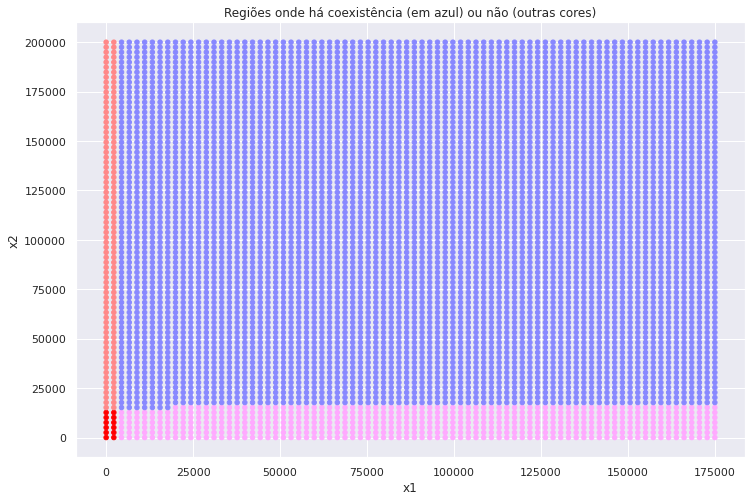

In [ ]:
pontos_iniciais_dataframe_d.plot.scatter(x='x1', y='x2', title="Regiões onde há coexistência (em azul) ou não (outras cores)", c=cores)